
--- Loading Dataset ---
Dataset Loaded Successfully!

Shape of Dataset: (246091, 7)

First 5 Rows:
                     State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

--- Dataset Summary ---

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ----

<ipython-input-1-84b9fd4336bd>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



Cleaned dataset saved to: cleaned_crop_production.csv

--- Visualizing Data ---


<ipython-input-1-84b9fd4336bd>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="coolwarm")


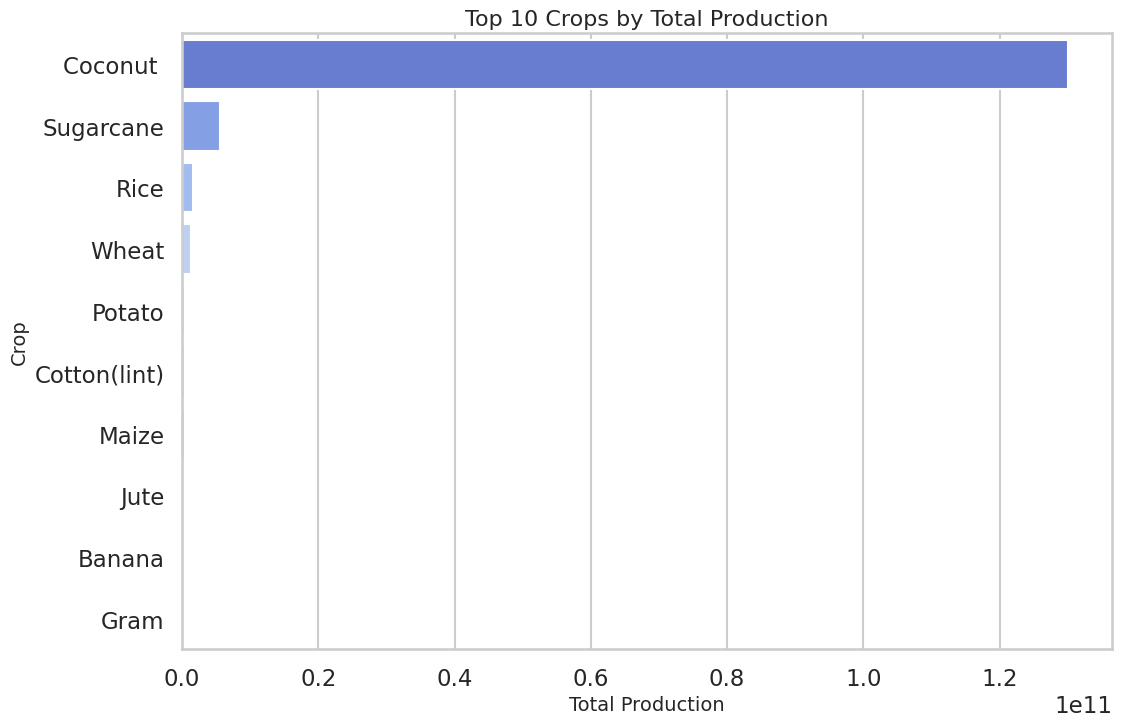

<ipython-input-1-84b9fd4336bd>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Season', estimator='sum', ci=None, linewidth=2)


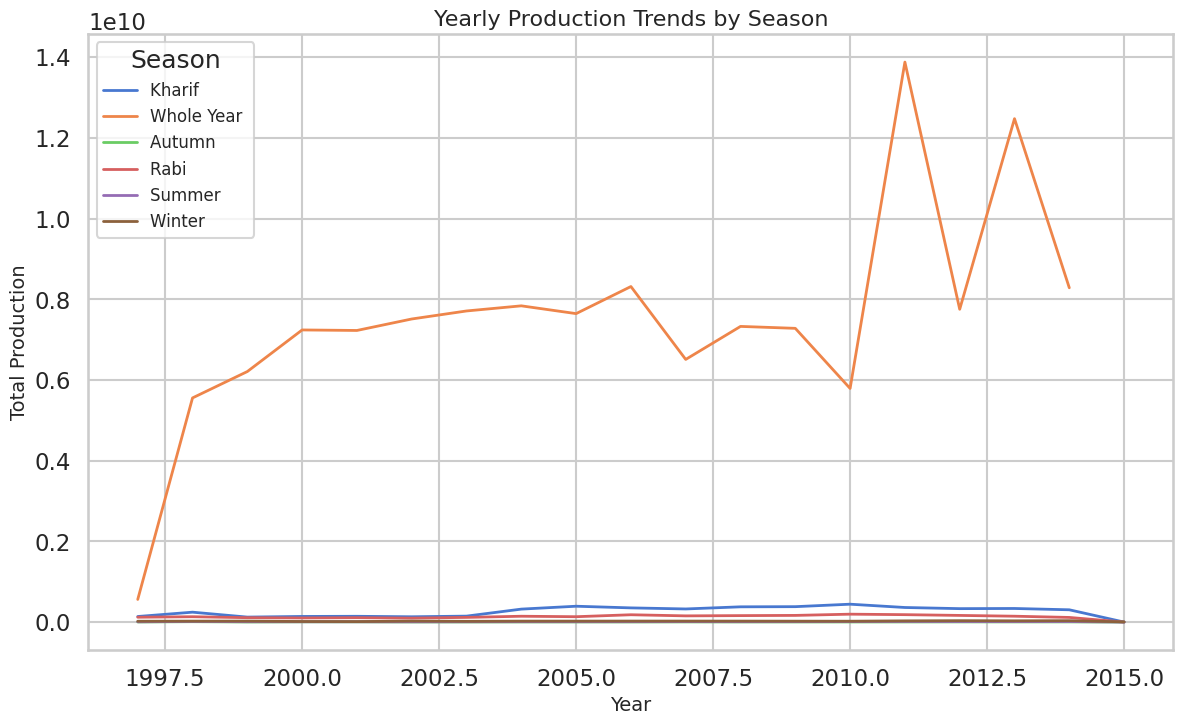

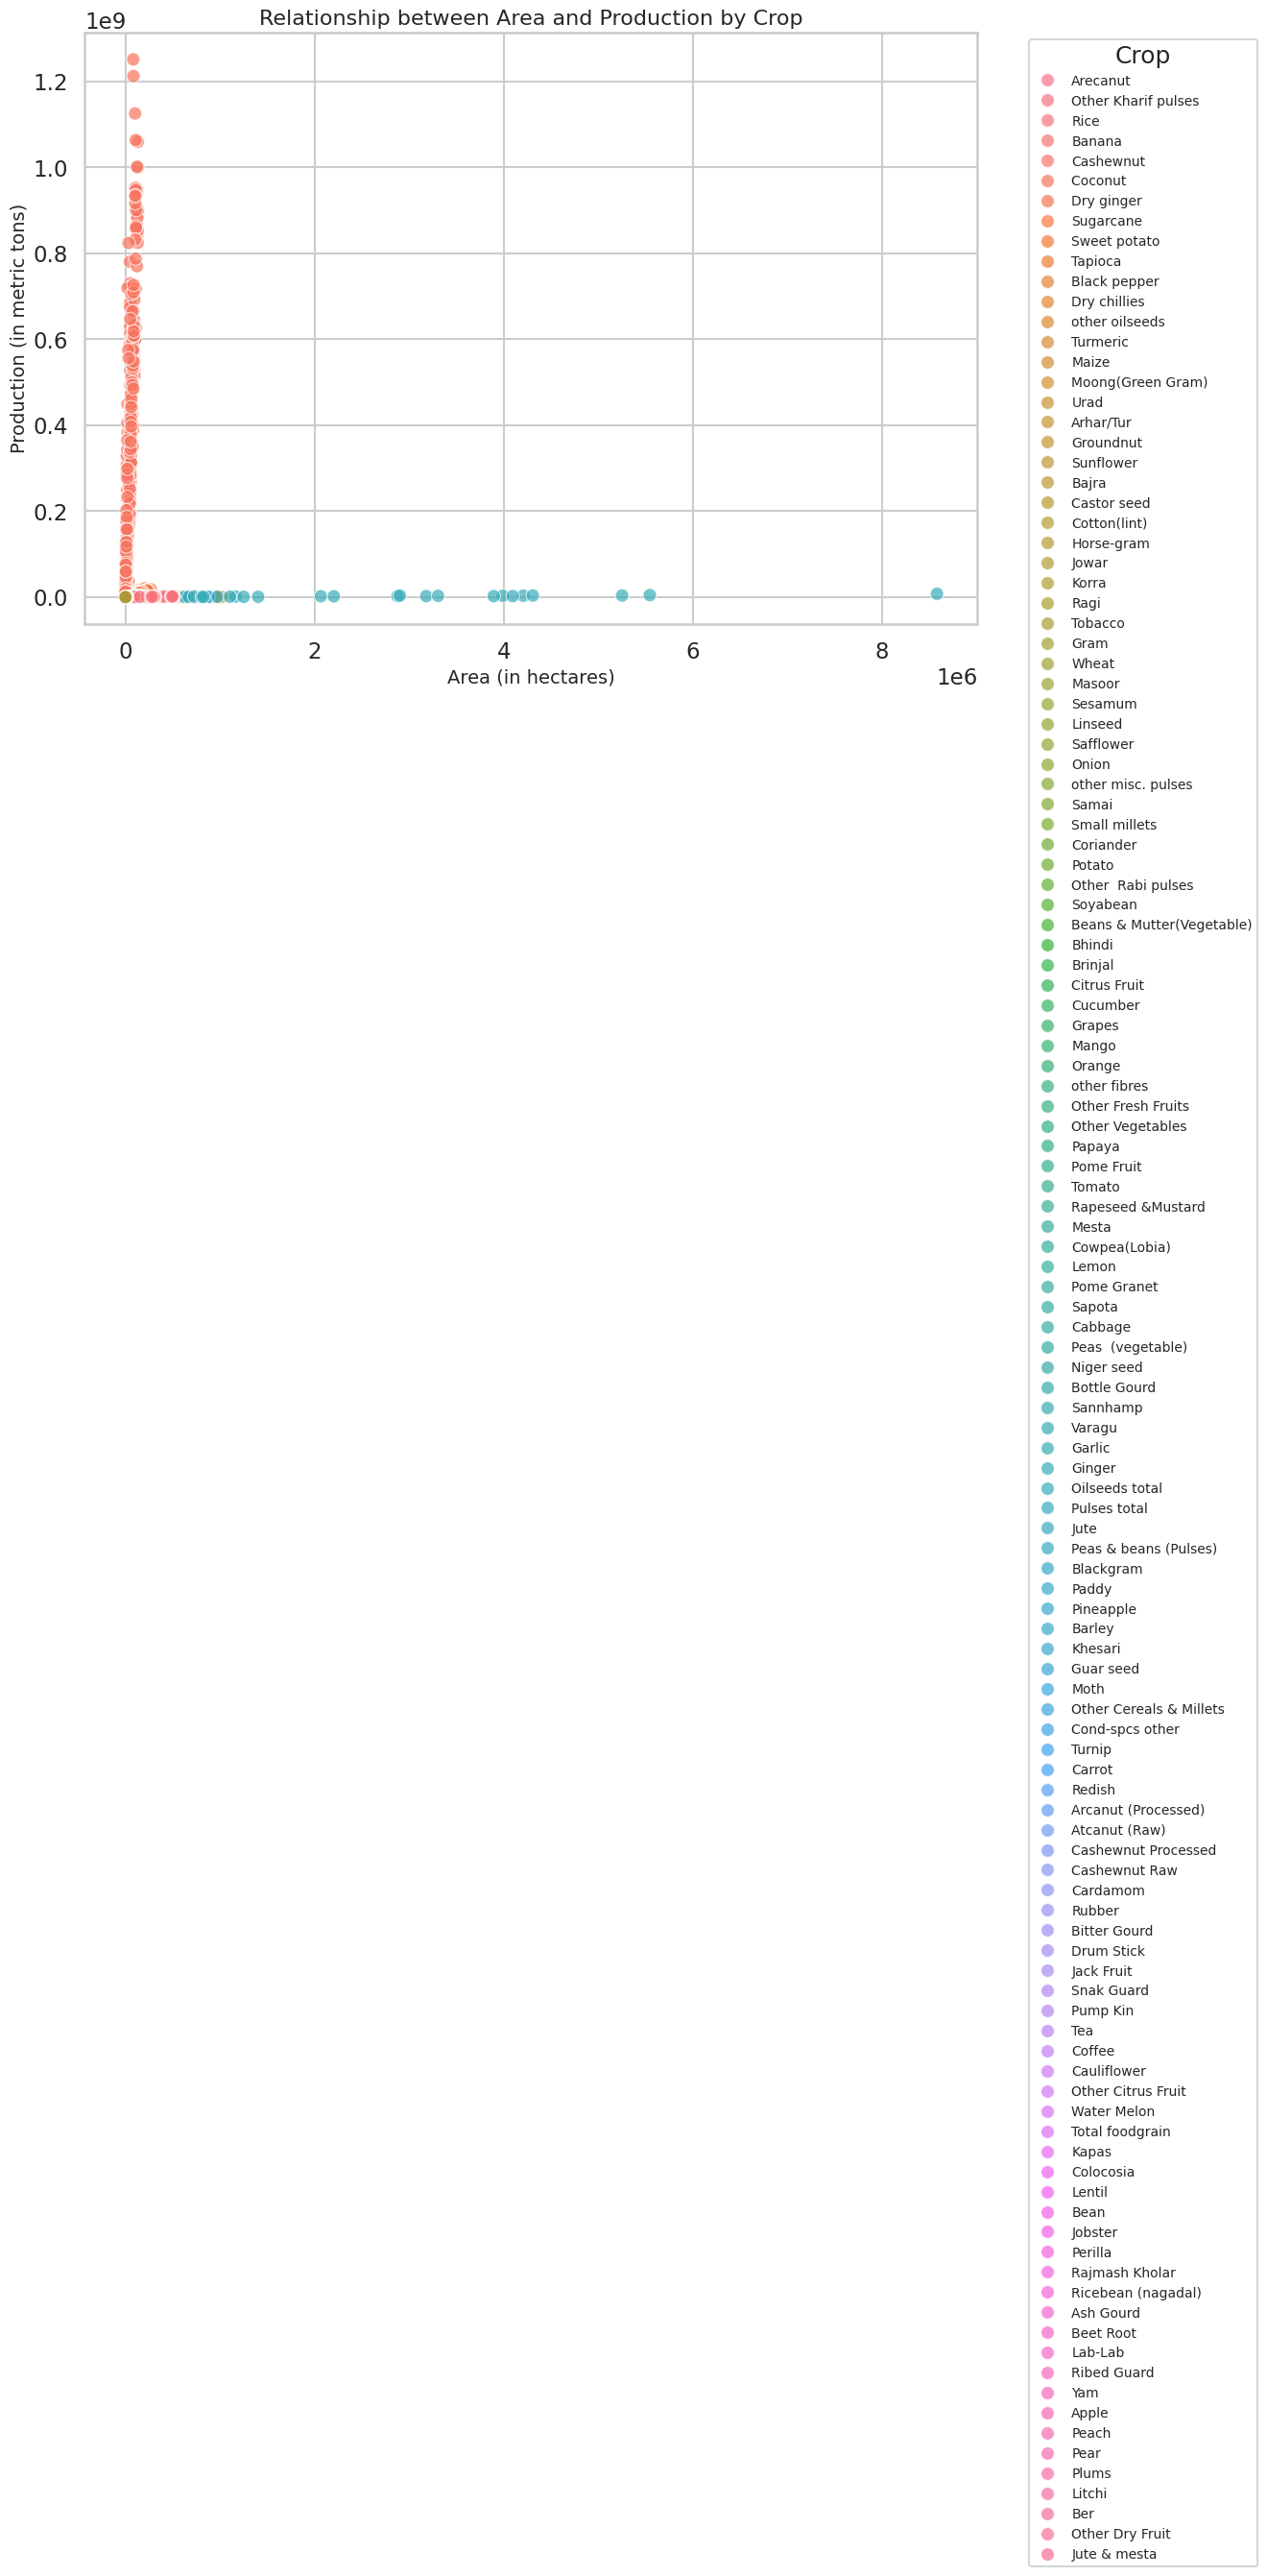

In [ ]:
# Importing necessary libraries we have
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


sns.set(style="whitegrid", context="talk", palette="muted")

# Define file path
file_path = "/content/Crop Production data.csv"  # Update with your file path

# Function to load and preview data
def load_and_preview_data(file_path):
    print("\n--- Loading Dataset ---")
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!\n")
    print(f"Shape of Dataset: {df.shape}")
    print("\nFirst 5 Rows:\n", df.head())
    return df

# Function to display dataset summary
def dataset_summary(df):
    print("\n--- Dataset Summary ---")
    print("\nInfo:")
    print(df.info())
    print("\nMissing Values per Column:")
    print(df.isnull().sum())
    print("\nStatistical Overview:")
    print(df.describe(include="all").T)

# Function to clean the data
def clean_data(df):
    print("\n--- Cleaning Data ---")
    # Fill missing numeric values with column means
    numeric_columns = ['Area', 'Production']
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            print(f"Filling missing values in {col} with mean: {df[col].mean():.2f}")
            df[col].fillna(df[col].mean(), inplace=True)
    # Remove duplicates (if any)
    initial_rows = df.shape[0]
    df = df.drop_duplicates()
    print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")
    return df

# Function to detect outliers using Z-Score
def detect_outliers(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    print(f"Outliers detected in {column}: {len(outliers)}")
    return outliers

# Function to visualize data
def plot_visualizations(df):
    print("\n--- Visualizing Data ---")

    # Top 10 crops by production
    crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
    top_crops = crop_production.head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_crops.values, y=top_crops.index, palette="coolwarm")
    plt.title("Top 10 Crops by Total Production", fontsize=16)
    plt.xlabel("Total Production", fontsize=14)
    plt.ylabel("Crop", fontsize=14)
    plt.show()

    # Yearly production trends grouped by season
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='Crop_Year', y='Production', hue='Season', estimator='sum', ci=None, linewidth=2)
    plt.title("Yearly Production Trends by Season", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Total Production", fontsize=14)
    plt.legend(title='Season', fontsize=12)
    plt.show()

    # Production vs Area Scatter Plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='Area', y='Production', hue='Crop', alpha=0.7, s=100)
    plt.title("Relationship between Area and Production by Crop", fontsize=16)
    plt.xlabel("Area (in hectares)", fontsize=14)
    plt.ylabel("Production (in metric tons)", fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Crop", fontsize=10)
    plt.show()

# Main workflow
if __name__ == "__main__":
    # Step 1: Load dataset
    data = load_and_preview_data(file_path)

    # Step 2: Dataset summary
    dataset_summary(data)

    # Step 3: Clean the dataset
    data_cleaned = clean_data(data)

    # Step 4: Detect and list outliers (example: Area column)
    area_outliers = detect_outliers(data_cleaned, 'Area')

    # Step 5: Save cleaned data for future use
    cleaned_file_path = "cleaned_crop_production.csv"
    data_cleaned.to_csv(cleaned_file_path, index=False)
    print(f"\nCleaned dataset saved to: {cleaned_file_path}")

    # Step 6: Visualize data
    plot_visualizations(data_cleaned)
